In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## 1) data generation

In [2]:
num_points = 1000
vectors_set = []

for i in range(num_points):
    x1 = np.random.normal(.0, 1.0)
    y1 = np.sin(x1) + np.random.normal(0., 0.1)
    vectors_set.append([x1, y1])

x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

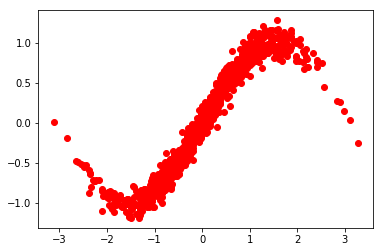

In [3]:
plt.plot(x_data, y_data, 'ro')

## 2) 모델 구축

In [4]:
_x_data = tf.expand_dims(x_data, 1)
_y_data = tf.expand_dims(y_data, 1)

W1 = tf.Variable(tf.random_uniform([1, 5], -1.0, 1.0))
W2 = tf.Variable(tf.random_uniform([5, 3], -1.0, 1.0))
W_out = tf.Variable(tf.random_uniform([3, 1], -1.0, 1.0))

hidden1 = tf.nn.sigmoid(tf.matmul(_x_data, W1))
hidden2 = tf.nn.sigmoid(tf.matmul(hidden1, W2))
output = tf.matmul(hidden2, W_out)

## 3) Learning

In [5]:
loss = tf.reduce_mean(tf.square(output-_y_data))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [6]:
sess = tf.Session()
sess.run(init)

for step in range(1000):
    sess.run(train)
    print("Loss Value", step, sess.run(loss))

Loss Value 0 0.66249436
Loss Value 1 0.6034677
Loss Value 2 0.56135046
Loss Value 3 0.53089464
Loss Value 4 0.50861514
Loss Value 5 0.49213988
Loss Value 6 0.47982323
Loss Value 7 0.4705074
Loss Value 8 0.4633684
Loss Value 9 0.4578145
Loss Value 10 0.45341858
Loss Value 11 0.44987002
Loss Value 12 0.44694275
Loss Value 13 0.44447106
Loss Value 14 0.44233367
Loss Value 15 0.44044128
Loss Value 16 0.4387284
Loss Value 17 0.43714643
Loss Value 18 0.43565962
Loss Value 19 0.43424147
Loss Value 20 0.43287238
Loss Value 21 0.43153772
Loss Value 22 0.43022645
Loss Value 23 0.4289305
Loss Value 24 0.4276436
Loss Value 25 0.42636114
Loss Value 26 0.4250794
Loss Value 27 0.4237958
Loss Value 28 0.4225078
Loss Value 29 0.42121395
Loss Value 30 0.41991284
Loss Value 31 0.41860306
Loss Value 32 0.4172838
Loss Value 33 0.415954
Loss Value 34 0.41461298
Loss Value 35 0.41326
Loss Value 36 0.41189447
Loss Value 37 0.41051576
Loss Value 38 0.4091232
Loss Value 39 0.4077162
Loss Value 40 0.40629444
Los

Loss Value 345 0.027443012
Loss Value 346 0.027423933
Loss Value 347 0.027404945
Loss Value 348 0.027386054
Loss Value 349 0.027367257
Loss Value 350 0.027348548
Loss Value 351 0.027329922
Loss Value 352 0.027311398
Loss Value 353 0.027292954
Loss Value 354 0.027274592
Loss Value 355 0.027256314
Loss Value 356 0.027238125
Loss Value 357 0.027220013
Loss Value 358 0.027201984
Loss Value 359 0.02718403
Loss Value 360 0.027166154
Loss Value 361 0.027148353
Loss Value 362 0.027130645
Loss Value 363 0.027112994
Loss Value 364 0.027095424
Loss Value 365 0.027077926
Loss Value 366 0.027060503
Loss Value 367 0.027043153
Loss Value 368 0.027025864
Loss Value 369 0.027008656
Loss Value 370 0.02699151
Loss Value 371 0.026974443
Loss Value 372 0.02695744
Loss Value 373 0.0269405
Loss Value 374 0.026923634
Loss Value 375 0.02690683
Loss Value 376 0.026890092
Loss Value 377 0.02687342
Loss Value 378 0.026856815
Loss Value 379 0.026840268
Loss Value 380 0.02682379
Loss Value 381 0.026807373
Loss Valu

Loss Value 689 0.023645453
Loss Value 690 0.023639178
Loss Value 691 0.023632923
Loss Value 692 0.023626683
Loss Value 693 0.023620464
Loss Value 694 0.023614258
Loss Value 695 0.02360807
Loss Value 696 0.023601893
Loss Value 697 0.023595741
Loss Value 698 0.023589604
Loss Value 699 0.02358348
Loss Value 700 0.023577368
Loss Value 701 0.023571275
Loss Value 702 0.023565203
Loss Value 703 0.023559146
Loss Value 704 0.0235531
Loss Value 705 0.02354707
Loss Value 706 0.023541061
Loss Value 707 0.023535065
Loss Value 708 0.023529086
Loss Value 709 0.023523116
Loss Value 710 0.023517173
Loss Value 711 0.023511238
Loss Value 712 0.02350532
Loss Value 713 0.023499418
Loss Value 714 0.02349353
Loss Value 715 0.023487661
Loss Value 716 0.0234818
Loss Value 717 0.023475965
Loss Value 718 0.023470135
Loss Value 719 0.023464326
Loss Value 720 0.023458531
Loss Value 721 0.023452748
Loss Value 722 0.023446983
Loss Value 723 0.02344123
Loss Value 724 0.023435498
Loss Value 725 0.023429776
Loss Value 

(-1.5, 1.5)

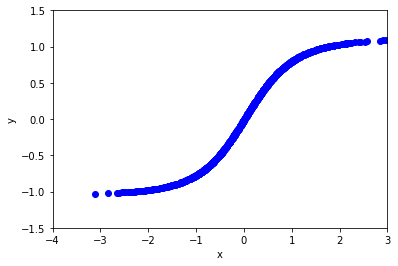

In [7]:
plt.plot(x_data, sess.run(output), 'bo')
plt.xlabel('x')
plt.xlim(-4, 3)
plt.ylabel('y')
plt.ylim(-1.5, 1.5)